딥러닝 파이토치 교과서
ch2. 4
 p.69~87

# CH2. 실습 환경 설정과 파이토치 기초

## 2.4 파이토치 코드 맛보기

파이토치 사용하여 간단한 분류 및 회귀 모델을 개발하는 방법 살펴보기

In [25]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [26]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
dataset = pd.read_csv('/content/drive/MyDrive/2025-1/2025-1 ESAA OB/과제/data/car_evaluation.csv')
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


단어를 벡터로 바꾸는 임베딩(embedding) 처리하기



예제 데이터셋 분포 출력 결과

<Axes: ylabel='count'>

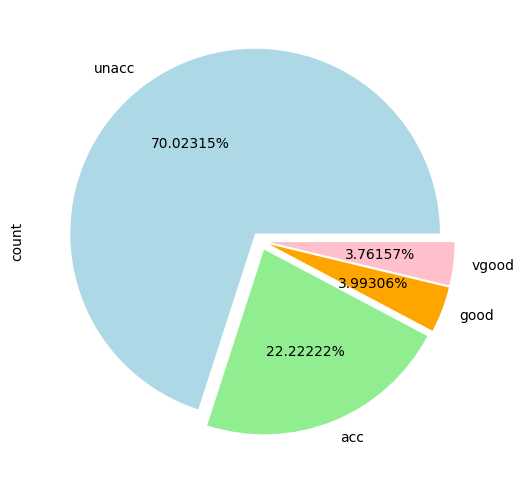

In [28]:
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams['figure.figsize'] = fig_size
dataset.output.value_counts().plot(kind='pie', autopct='%0.05f%%',
                                    colors=['lightblue', 'lightgreen','orange', 'pink'],
                                   explode = (0.05, 0.05, 0.05, 0.05))

- 허용 불가능한 상태의 자동차 : 70%
- 허용 가능한 상태의 자동차 : 20%




데이터를 범주형 타입으로 변환하기

In [29]:
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']

for category in categorical_columns:
    dataset[category] = dataset[category].astype('category')
    # astype() 메서드를 이용하여 데이터를 범주형으로 변환

price = dataset['price'].cat.codes.values # 1
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1) # 2
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

------------------


1. 범주형 데이터를 텐서로 변환하기 위한 절차

- 범주형 데이터 -> dataset[category] -> 넘파이 배열 (NumPy array) -> 텐서(Tensor)

2. np.stack은 두 개 이상의 넘파이 객체를 합칠 때 사용

- np.concatenate
 - 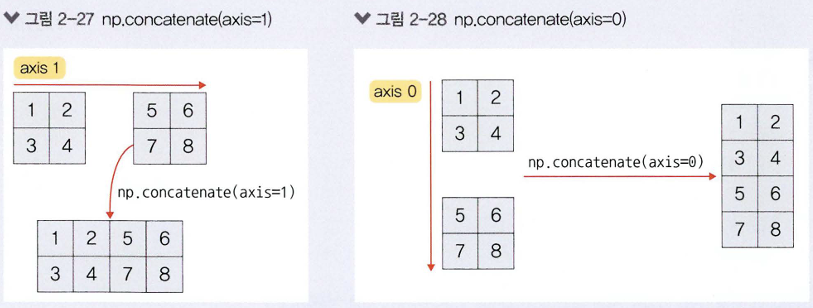

- np.stack
 - 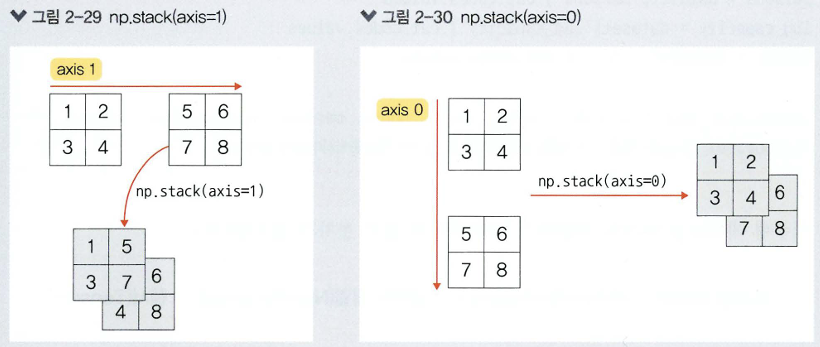

In [30]:
a = np.array([[1,2], [3,4]])
b = np.array([[5,6], [7,8]])
c = np.array([[5,6], [7,8], [9,10]])

print('같은 차원의 a와 b에 적용')
print(np.concatenate((a,b), axis=0))
print('-----------------------------')
print(np.stack((a,b), axis=0))

같은 차원의 a와 b에 적용
[[1 2]
 [3 4]
 [5 6]
 [7 8]]
-----------------------------
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


In [31]:
print('다른 차원의 a와 b에 적용')
print(np.concatenate((a,c), axis=0))
print('-----------------------------')
# print(np.stack((a,c), axis=0)) # 오류 발생

다른 차원의 a와 b에 적용
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]
-----------------------------


----------

배열을 텐서로 변환

In [32]:
categorical_data = torch.tensor(categorical_data, dtype = torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

레이블로 사용할 칼럼에 대해 텐서로 변한하기

In [33]:
outputs = pd.get_dummies(dataset.output) # 1
outputs = outputs.values
outputs = torch.tensor(outputs).flatten() # 1차원 텐서로 변환

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


--------------
1. get_dummies 는 가변수로 만들어 주는 함수
- 문자를 숫자 (0,1) 로 바꾸어 준다는 의미

예시 : 성별, 몸무게, 국적 칼럼 배열

In [34]:
import pandas as pd
import numpy as np

data = {
    'gender' : ['male', 'female', 'male'],
    'weight' : [72, 55, 68],
    'nation' : ['Japan', 'Korea', 'Australia']
}

df = pd.DataFrame(data)
df

,gender,weight,nation
0,male,72,Japan
1,female,55,Korea
2,male,68,Australia


성별과 국적을 숫자로 변환하기 위해 get_dummies() 적용하기

In [35]:
pd.get_dummies(df)

,weight,gender_female,gender_male,nation_Australia,nation_Japan,nation_Korea
0,72,False,True,False,True,False
1,55,True,False,False,False,True
2,68,False,True,True,False,False


-> 숫자의 값을 가졌던 몸무게는 변화 없음

-> 성별과 국적은 0과 1로 변경됨

---------------------------------
ravel(), reshape(), flatten() : 텐서의 차원 바꿀 때 사용

In [36]:
a = np.array([[1,2],
              [3,4]])
print(a.ravel())
print(a.reshape(-1))
print(a.flatten())

[1 2 3 4]
[1 2 3 4]
[1 2 3 4]


------------------------

-------------------------

워드 임베딩 : 유사한 단어끼리 유사하게 인코딩되도록 표현하는 방법
- 높은 차원의 임베딩일수록 단어 간의 세부적인 관계 잘 파악할 수 있음
- 단일 숫자로 변환된 넘파이 배열을 N차원으로 변경하여 사용

범주형 칼럼을 N차원으로 변환하기
- 모든 범주형 칼럼에 대한 임베딩 크기(벡터 차원)를 정의
- 칼럼의 고유 값 수를 2로 나누는 것을 많이 사용함

In [37]:
categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


데이터셋 분리

In [38]:
total_records = 1728
test_records = int(total_records * .2) # 전체 데이터 중 20%를 테스트 용도로 사용

categorical_train_data = categorical_data[:total_records - test_records]
categorical_test_data = categorical_data[total_records - test_records:total_records]
train_outputs = outputs[:total_records - test_records]
test_outputs = outputs[total_records - test_records:total_records]

In [39]:
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


모델의 네트워크 생성하기

In [44]:
class Model(nn.Module): # 1
    def __init__(self, embedding_size, output_size, layers, p=0.4): # 2
        super().__init__() # 3
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols # 입력층의 크기를 찾기 위해 범주형 칼럼 개수를 input_size 변수에 저장

        for i in layers : # 4
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers)
        # 신경망의 모든 계층이 순차적으로 실행되도록 모든 계층에 대한 목록(all_layers)을 nn.Sequential 클래스로 전달

    def forward(self, x_categorical): # 5
        embeddings = []
        for i, e in enumerate(self.all_embeddings) :
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)
        x = self.layers(x)
        return x

-------------------
1. 클래스 형태로 구현되는 모델은 nn.Module을 상속 받음
2. __init__()
- 모델에서 사용될 파라미터와 신경망을 초기화하는 용도
- 객체가 생성될 때 자동으로 호출
- def __init__(self, embedding_size, output_size, layers, p=0.4)
 - self : 자기 자신을 의미
 - embedding_size : 범주형 칼럼의 임베딩 크기
 - output_size : 출력층의 크기
 - layers : 모든 계층에 대한 목록
 - p : 드롭아웃 (기본값 : 0.5)

3. super().__init__() : 부모 클래스(nn.Module)에 접근할 때 사용

4. 모델의 네트워크 계층 구축하기 위해 for 문을 이용하여 all_layers 목록에 추가함
 - Linear : 선형 계층 - 입력 데이터에 선형 변환 진행한 결과
  - y = Wx + b (y : 선형계층 출력 값, W : 가중치, x : 입력 값, b : 바이어스)
 - ReLU : 할성화 함수로 사용
 - BatchNorm1d : 배치 정규화 용도로 사용
 - Dropout : 과적합 방지에 사용

 5. forward() 함수 : 학습 데이터를 입력 받아서 연산을 진행, 모델 객체를 데이터와 함께 호출하면 자동으로 실행됨

-------------------------

Model 클래스의 객체를 생성
 - 객체를 생성하면서 (범주형 칼럼의 임베딩 크기, 출력 크기, 은닉층의 뉴런, 드롭아웃)을 전달함

In [45]:
model = Model(categorical_embedding_sizes, 4, [200,100,50], p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


모델의 파라미터 정의
- 손실 함수와 옵티마이저에 대해 정의해야 함
- 데이터를 분류해야 하는 것으로 크로스 엔트로피 손실 함수를 사용하기

In [46]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

CPU/GPU 사용 지정하기

In [48]:
if torch.cuda.is_available() :
    device = torch.device('cuda') # GPU가 있다면 GPU 사용
else:
    device = torch.device('cpu') # GPU가 없다면 CPU 사용

모델 학습시키기

In [50]:
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)

for i in range(epochs) : # for 문은 500회 반복되며, 각 반복마다 손실 함수가 오차를 계산
    i += 1
    y_pred = model(categorical_train_data).to(device)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss) # 반복할 때마다 오차를 aggregated_losses에 추가

    if i%25 == 1:
        print(f'epoch: {i:3} loss : {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward() # 가중치를 업데이트 하기 위해 손실 함수의 backward() 메서드 호출
    optimizer.step() # 옵티마이저 함수의 step() 메서드를 이용하여 기울기 업데이트

print(f'epoch: {i:3} loss : {single_loss.item():10.10f}') # 오차가 25 에포크마다 출력

epoch:   1 loss : 1.65754151
epoch:  26 loss : 1.46718359
epoch:  51 loss : 1.37510359
epoch:  76 loss : 1.23067498
epoch: 101 loss : 1.11347651
epoch: 126 loss : 0.94038731
epoch: 151 loss : 0.83885098
epoch: 176 loss : 0.75006759
epoch: 201 loss : 0.69860500
epoch: 226 loss : 0.66160393
epoch: 251 loss : 0.63594067
epoch: 276 loss : 0.61312407
epoch: 301 loss : 0.59922796
epoch: 326 loss : 0.59836650
epoch: 351 loss : 0.59091800
epoch: 376 loss : 0.58574611
epoch: 401 loss : 0.57871062
epoch: 426 loss : 0.58119994
epoch: 451 loss : 0.57417005
epoch: 476 loss : 0.57405448
epoch: 500 loss : 0.5768868327


테스트 데이터셋으로 예측 진행하기 : categorical_test_data 데이터셋을 모델에 적용

In [51]:
test_outputs = test_outputs.to(device=device, dtype=torch.int64)
with torch.no_grad() :
    y_val = model(categorical_test_data)
    loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

Loss: 0.55689615


-> 테스트 용도의 데이터셋에 손실 값을 보여 줌

(훈련 데이터셋에서 도출된 손실 값과 비슷함 -> 과적합 발생 x)

테스트 데이터셋을 이용할 때 모델이 얼마나 잘 예측하는지 살펴보기

In [52]:
print(y_val[:5])

tensor([[ 3.0004,  2.1211, -4.3315, -3.5816],
        [ 3.7540,  2.3933, -4.4252, -4.3052],
        [ 3.5814,  2.2422, -3.9810, -3.7190],
        [ 6.6616,  3.6857, -8.5339, -6.8242],
        [ 2.5514,  2.1055, -4.3575, -4.6259]])


가장 큰 값을 갖는 인덱스 확인

In [53]:
y_val = np.argmax(y_val, axis=1)
print(y_val[:5])

tensor([0, 0, 0, 0, 0])


-> 인덱스가 0인 값이 인덱스가 1인 값보다 큼 -> 처리된 출력이 0임을 확인

정확도, 정밀도, 재현율 확인

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(test_outputs, y_val))
print(classification_report(test_outputs, y_val))
print(accuracy_score(test_outputs, y_val))

[[258   1]
 [ 85   1]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       259
           1       0.50      0.01      0.02        86

    accuracy                           0.75       345
   macro avg       0.63      0.50      0.44       345
weighted avg       0.69      0.75      0.65       345

0.7507246376811594


딥러닝 분류 모델의 성능 평가 지표 알아보기
- True Positive : 모델이 '1'이라고 예측했는데 실제 값도 '1'인 경우
- True Negative : 모델이 '0'이라고 예측했는데 실제 값도 '0'인 경우
- False Positive : 모델이 '1'이라고 예측했는데 실제 값은 '0'인 경우, Type 1 오류
- False Negative : 모델이 '0'이라고 예측했는데 실제 값은 '1'인 경우, Type 2 오류


정확도, 재현율, 정밀도, F1-set_correction

- 정확도 (accuracy) = (TP + TN) / (TP + TN + FP + FN)
- 재현율 (recall) = (TP) / (TP + FN)
- 정밀도 (precision) = (TP) / (TP + FP)
- F1-스코어 (F1-score) = 2 * (Precision * Recall) / (Precision + Recall)
 - 트레이드오프 관계인 정밀도와 재현율의 조화 평균